# Toyota_Corolla_Multilinear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
cp = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')

In [4]:
cp.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df = cp[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
df.columns=["Price","Age","KM","HP","cc","Doors","Gears","QuarterlyTax","Weight"]
df

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QuarterlyTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age           1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   cc            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
df.isna().sum()

Price           0
Age             0
KM              0
HP              0
cc              0
Doors           0
Gears           0
QuarterlyTax    0
Weight          0
dtype: int64

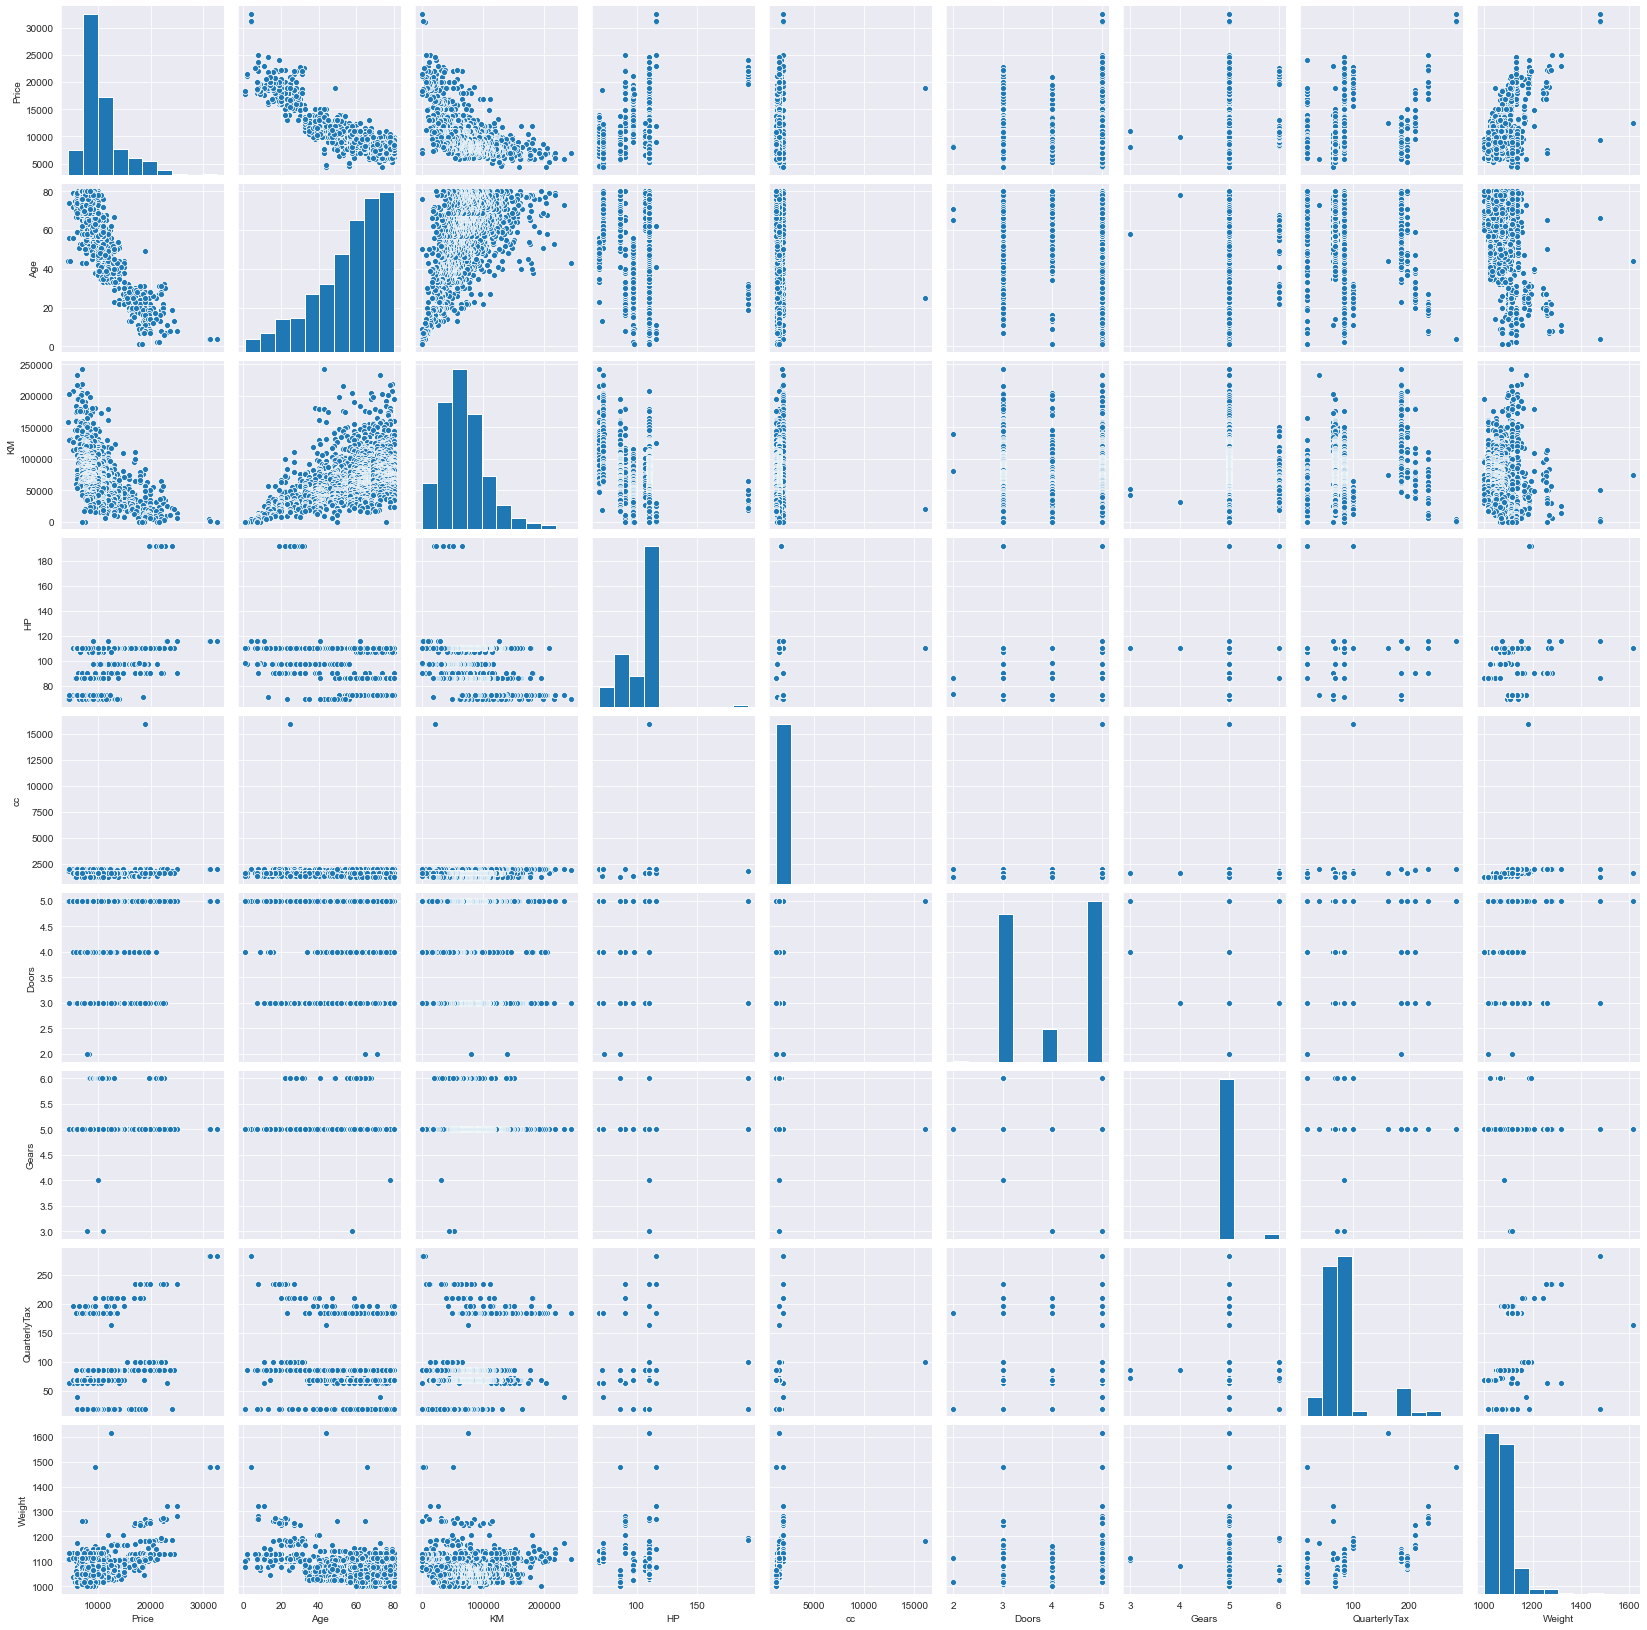

In [11]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df)


# Model Building

In [76]:
## Build a model
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df).fit()

In [77]:
model1.params

Intercept      -5573.106358
Age             -121.658402
KM                -0.020817
HP                31.680906
cc                -0.121100
Doors             -1.616641
Gears            594.319936
QuarterlyTax       3.949081
Weight            16.958632
dtype: float64

In [78]:
print(model1.rsquared.round(3),"\n" ,model1.rsquared_adj.round(3))

0.864 
 0.863


In [79]:
print(model1.tvalues, '\n', model1.pvalues.round(3))

Intercept       -3.948666
Age            -46.511852
KM             -16.621622
HP              11.241018
cc              -1.344222
Doors           -0.040410
Gears            3.016007
QuarterlyTax     3.014535
Weight          15.879803
dtype: float64 
 Intercept       0.000
Age             0.000
KM              0.000
HP              0.000
cc              0.179
Doors           0.968
Gears           0.003
QuarterlyTax    0.003
Weight          0.000
dtype: float64


In [80]:
model2 = smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data= df).fit()
print(model2.rsquared.round(3), '\n', model2.rsquared_adj.round(3))

0.864 
 0.863


In [72]:
model3 = smf.ols('Price~Age+KM+HP+Gears+QuarterlyTax+Weight', data=df).fit()
print(model3.rsquared.round(3), '\n', model3.rsquared_adj.round(3))

0.864 
 0.863


# Simple Linear Regression Models

In [34]:
### Simple Linear Regresssion for cc and Doors
ml_cc = smf.ols('Price~cc', data= df).fit()
print(ml_cc.tvalues.round(3), '\n', ml_cc.pvalues.round(3))

Intercept    24.694
cc            4.825
dtype: float64 
 Intercept    0.0
cc           0.0
dtype: float64


In [36]:
ml_doors = smf.ols('Price~Doors', data= df).fit()
print(ml_doors.tvalues.round(3), '\n', ml_doors.pvalues.round(3))

Intercept    19.258
Doors         7.142
dtype: float64 
 Intercept    0.0
Doors        0.0
dtype: float64


# Calcalating VIF

In [44]:
### VIF Values Calculating

rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df).fit().rsquared
vif_age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+QuarterlyTax+Weight',data=df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QuarterlyTax = smf.ols('QuarterlyTax~Age+KM+HP+cc+Doors+Gears+Weight', data=df).fit().rsquared
vif_QuarterlyTax = 1/(1-rsq_QuarterlyTax)

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QuarterlyTax', data=df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

vif = {'Variables': ['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QuarterlyTax',
       'Weight'], 'VIF': [vif_age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_QuarterlyTax, vif_Weight]}
Vif_Values = pd.DataFrame(vif)
Vif_Values

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156278
5,Gears,1.059085
6,QuarterlyTax,2.311431
7,Weight,2.516420


# Test for Normality of Residuals (Q-Q Plots)

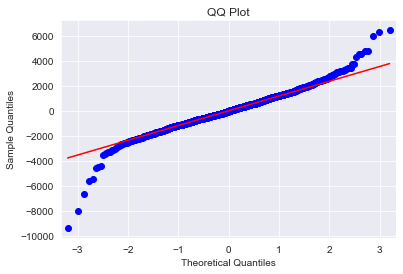

In [43]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('QQ Plot')
plt.show()

In [46]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [47]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]


# Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

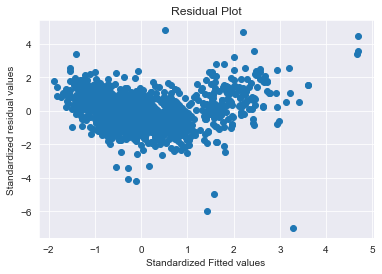

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals Vs Regressors Plots

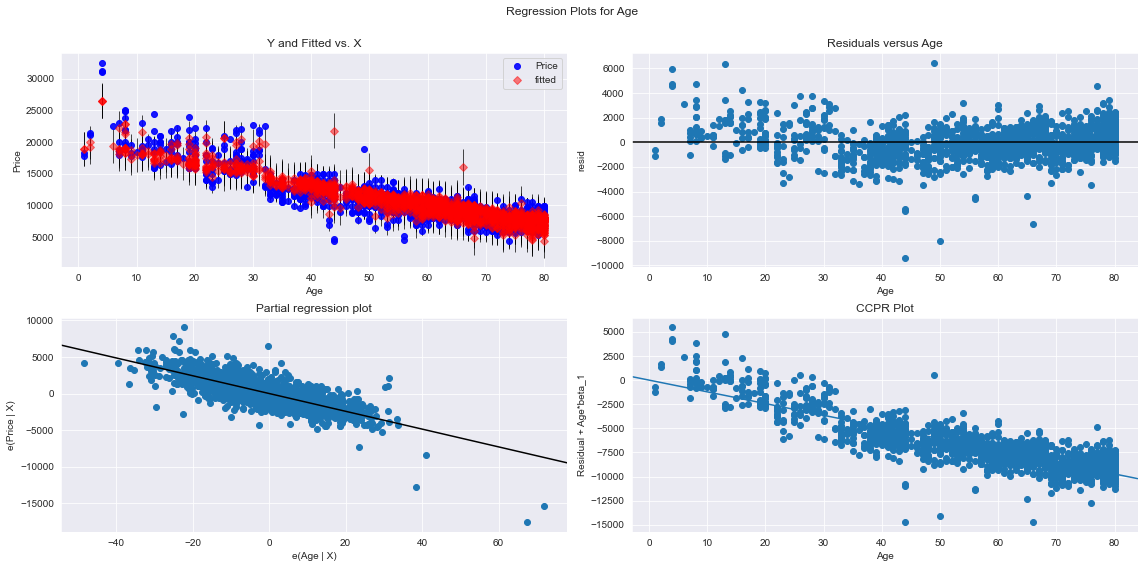

In [23]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

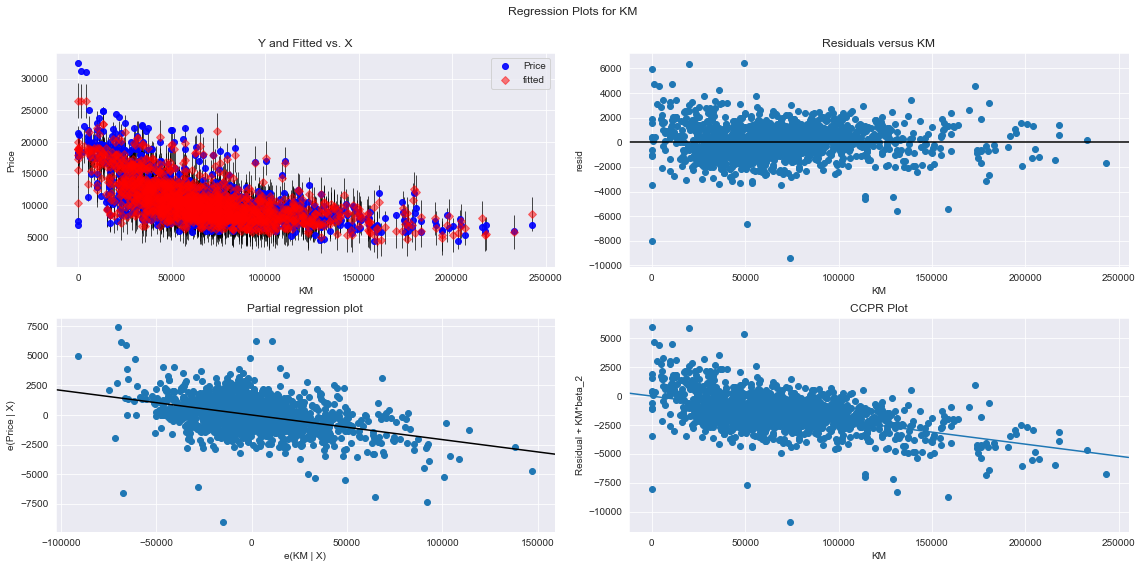

In [24]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

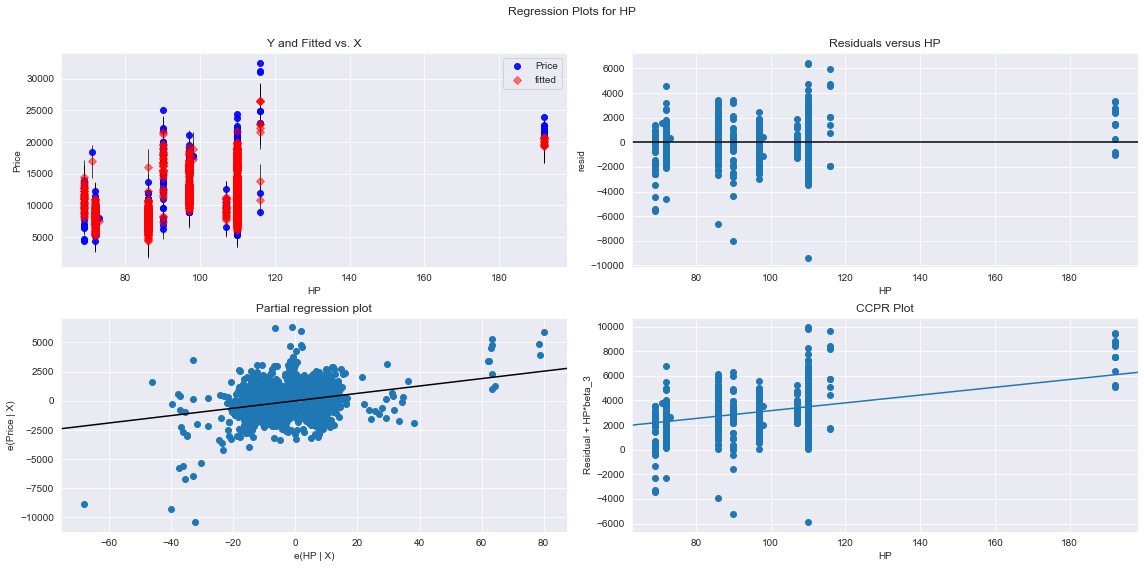

In [25]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

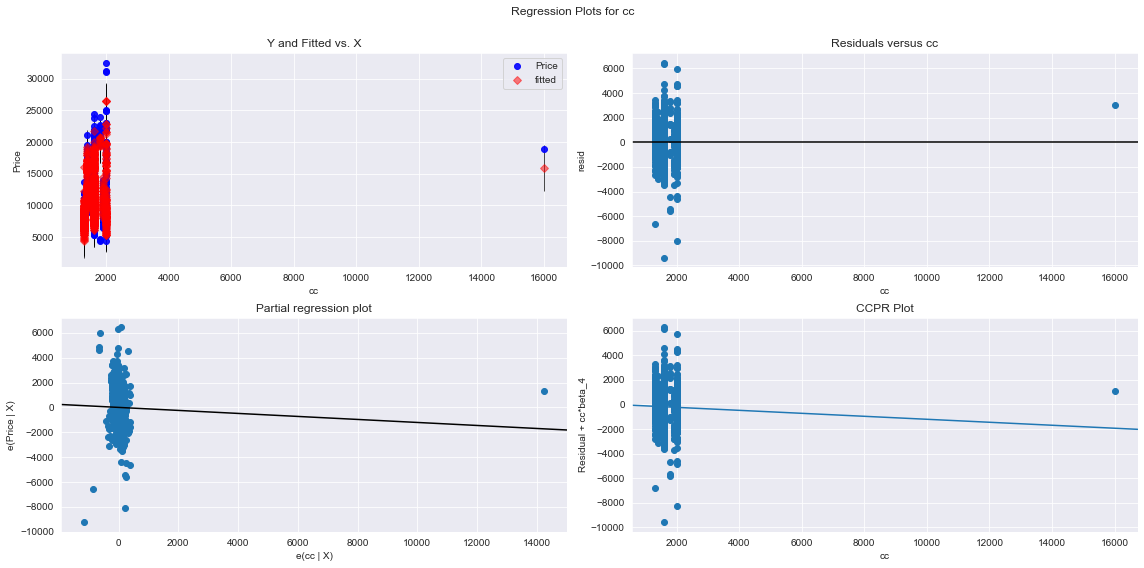

In [32]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig=fig)
plt.show()

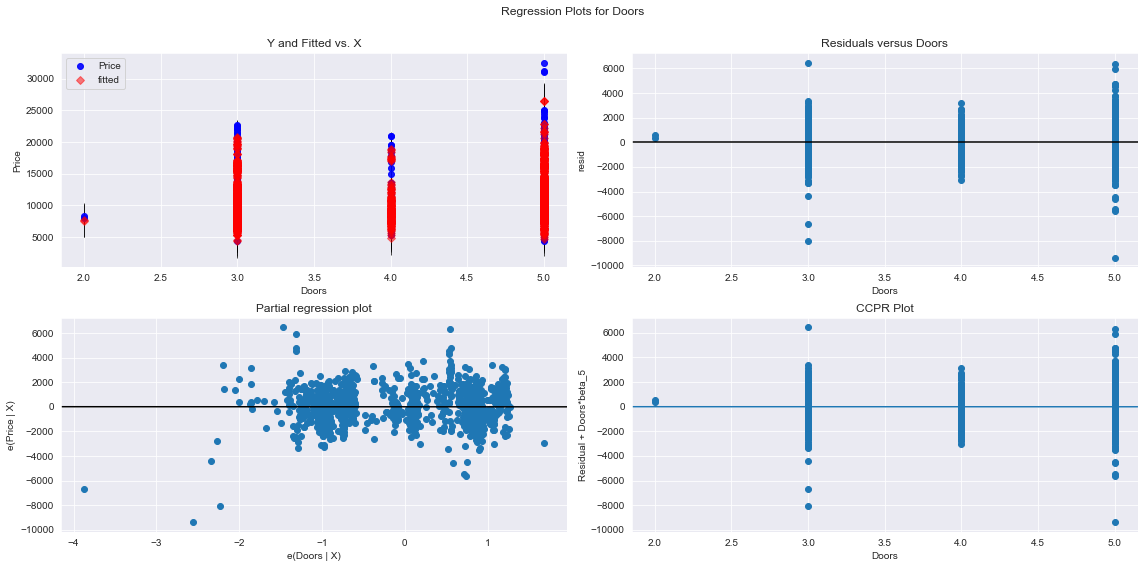

In [33]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

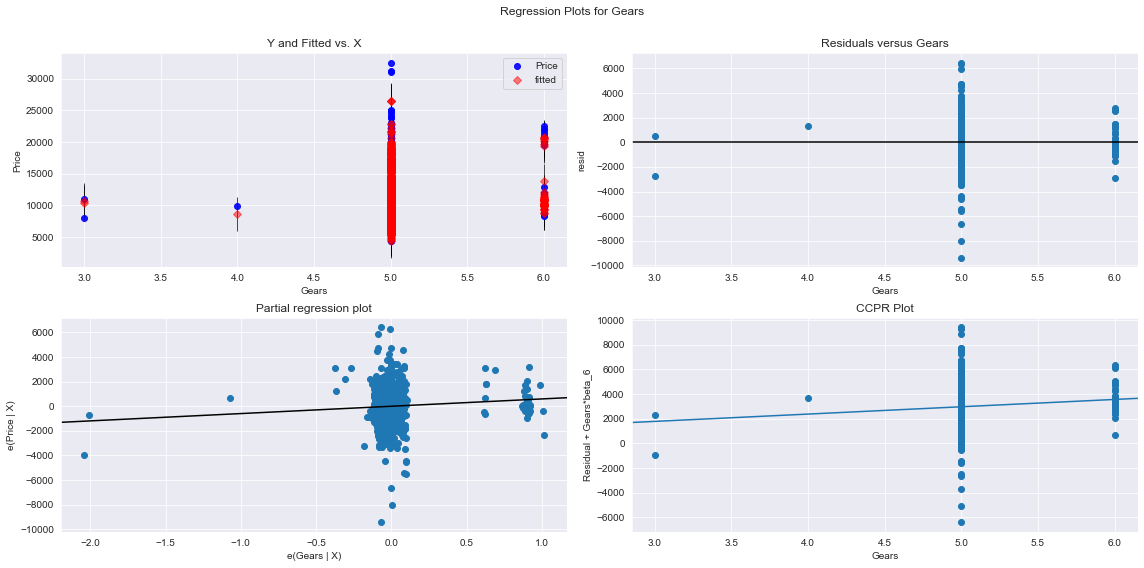

In [34]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

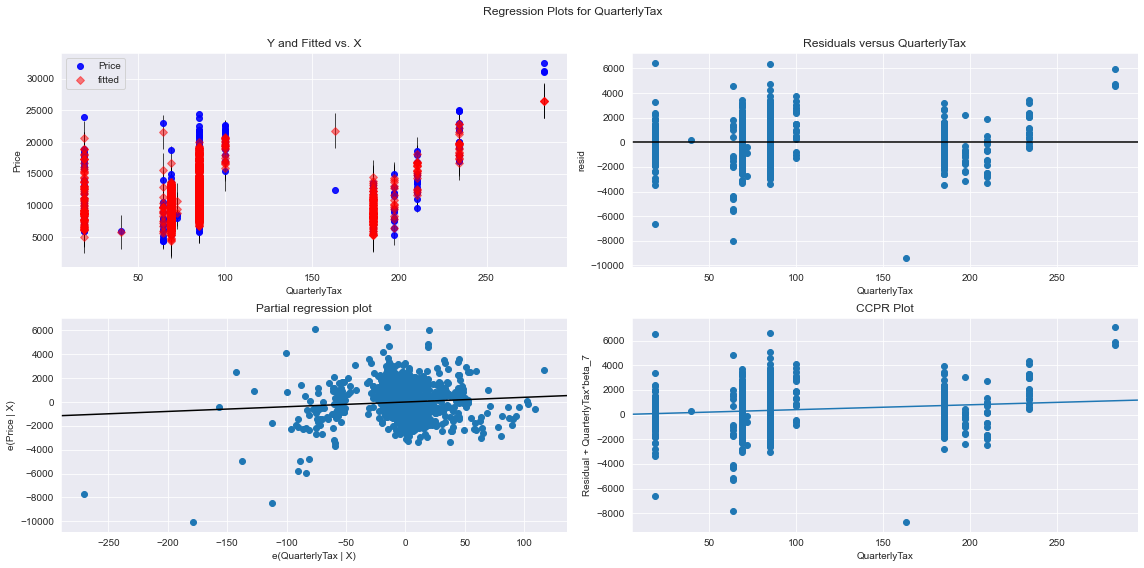

In [35]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'QuarterlyTax', fig=fig)
plt.show()

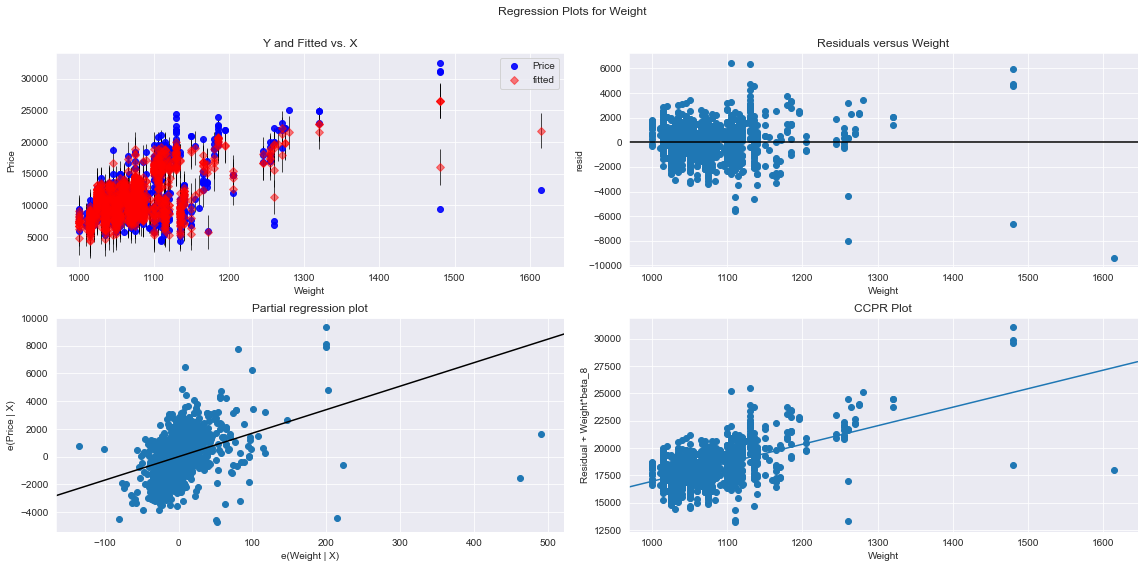

In [36]:
fig = plt.figure(figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Outliers/Influencers

# Cook's Distance

In [28]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [51]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

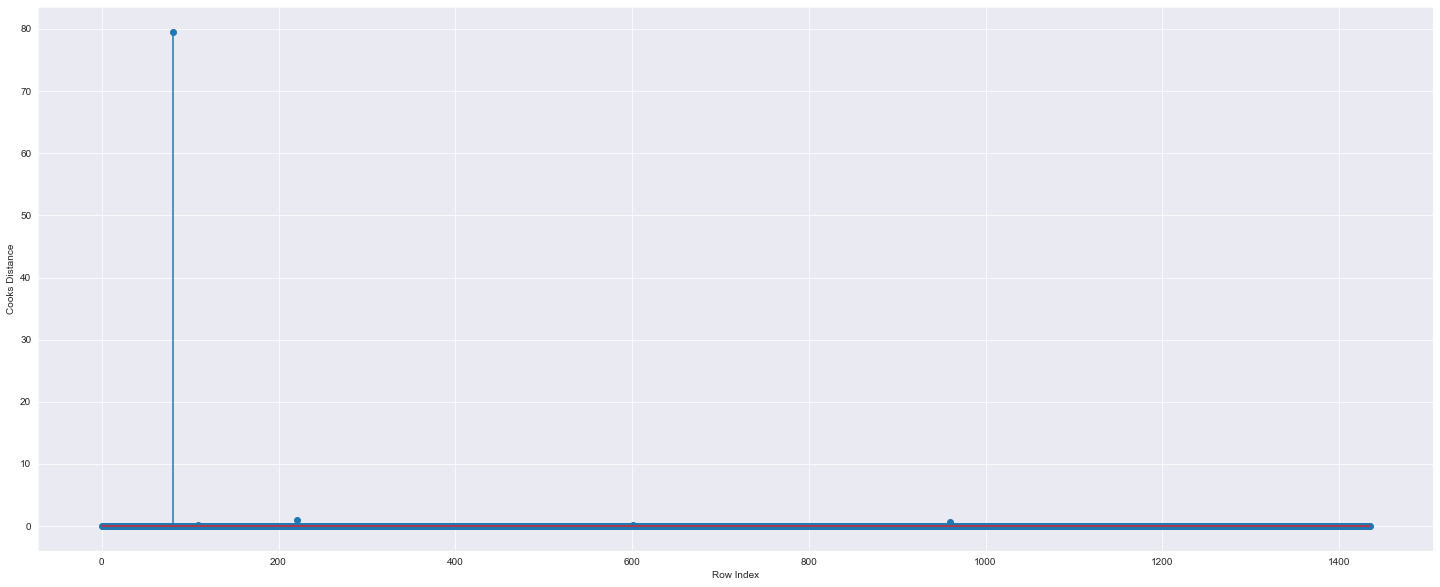

In [49]:
fig = plt.subplots(figsize =(25,10))
plt.stem(np.arange(len(df)), np.round(c,3), use_line_collection= True)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(80, 79.5201062414182)

# High Influence Point

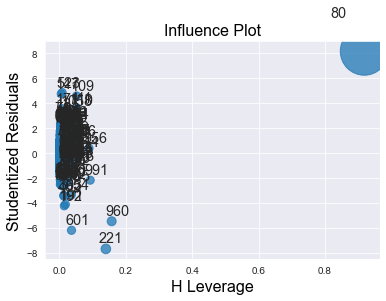

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [55]:
a = df.shape[1]
b = df.shape[0]
leverage_cutoff = 3*((a+1)/b)
leverage_cutoff

0.020891364902506964

In [56]:
df[df.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [58]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the Model

In [59]:
df_new = df.drop(df.index[80], axis=0).reset_index()

In [60]:
df_new

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [62]:
df_new = df_new.drop(['index'], axis = 1)

In [64]:
df_new

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [74]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df_new).fit()
print(model4.rsquared.round(3), '\n', model4.rsquared_adj.round(3))

0.869 
 0.869


In [90]:
model_influence_2 = model4.get_influence()
(c_2, _) = model_influence_2.cooks_distance

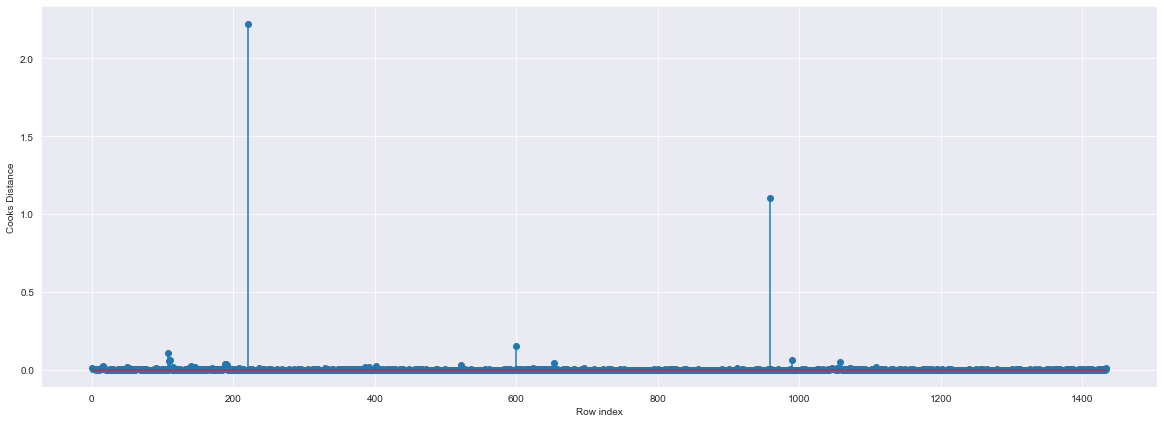

In [92]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c_2,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [94]:
(np.argmax(c_2), np.max(c_2))

(220, 2.224461171300723)

In [97]:
df_new2 = df_new.drop(df_new.index[220], axis=0).reset_index()

In [98]:
df_new2

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [104]:
df_new2 = df_new2.drop(['index'], axis = 1)
df_new2

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [116]:
model5 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= df_new2).fit()
print(model5.rsquared.round(3), '\n', model5.rsquared_adj.round(3))

0.878 
 0.877


In [117]:
model_influence_3 = model5.get_influence()
(c_3, _) = model_influence_3.cooks_distance

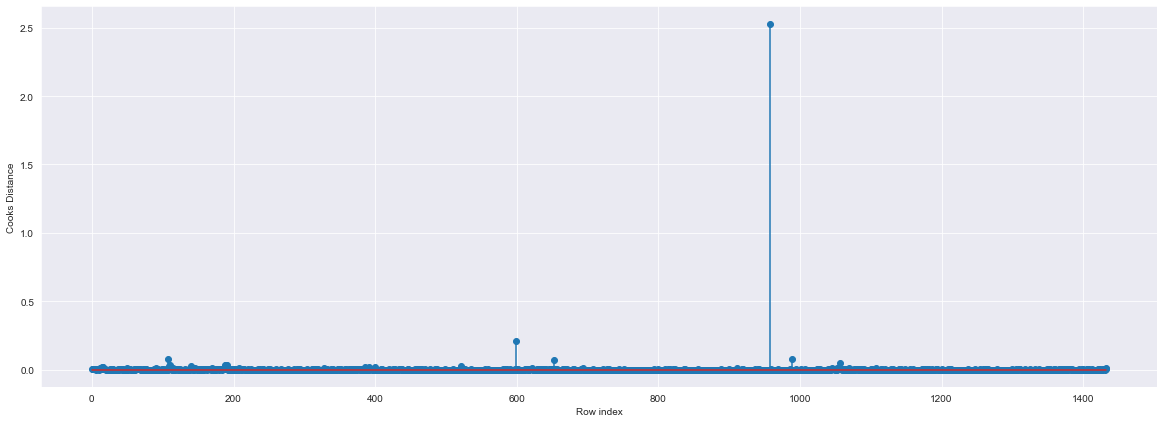

In [120]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new2)),np.round(c_3,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [121]:
(np.argmax(c_3), np.max(c_3))

(958, 2.5312566930232503)

In [123]:
final_df = df_new2.drop(df_new.index[958], axis=0).reset_index()

In [124]:
final_df = final_df.drop(['index'], axis = 1)

In [126]:
final_df

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [164]:
final_model = smf.ols('Price~Age+np.sqrt(KM)+HP+cc+Doors+Gears+QuarterlyTax+Weight', data= final_df).fit()
print(final_model.rsquared.round(3), '\n', final_model.rsquared_adj.round(3))

0.886 
 0.885


In [129]:
model_influence_4 = final_model.get_influence()
(c_4, _) = model_influence_4.cooks_distance

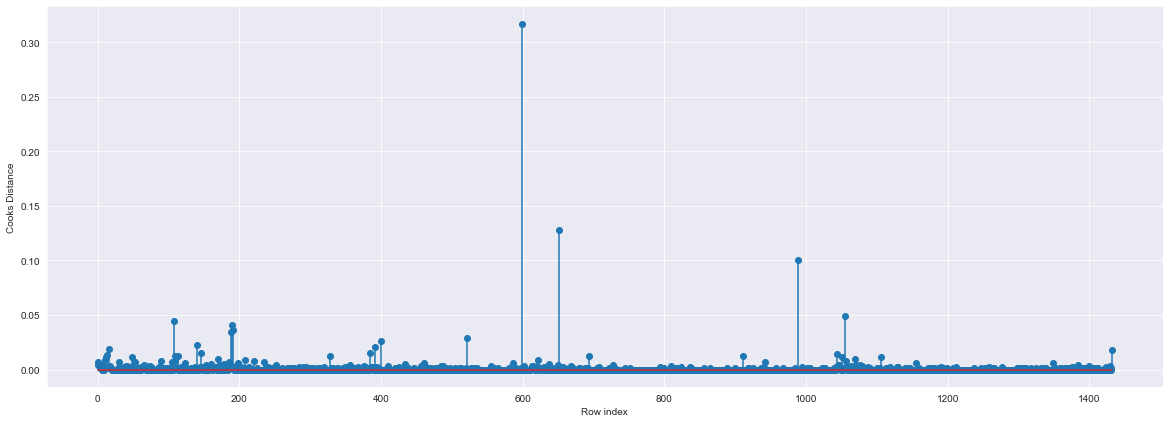

In [163]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(final_df)),np.round(c_4,3), use_line_collection= True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [132]:
(np.argmax(c_4), np.max(c_4))

(599, 0.3166131528144215)

In [138]:
new_data = pd.DataFrame({'Age': 5, 'KM': 10000, 'HP': 300, 'cc': 1200, 'Doors': 4, 'Gears': 4, 'QuarterlyTax': 12000, 'Weight': 500 }, index =[1])

In [140]:
new_data

,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
1,5,10000,300,1200,4,4,12000,500


In [141]:
final_model.predict(new_data)

1    70205.625479
dtype: float64

In [143]:
final_model.predict(final_df.iloc[0:10])

0    16333.273814
1    15892.326850
2    16310.886081
3    15979.990390
4    15846.536733
5    15240.191494
6    17527.146348
7    17509.224576
8    20881.291978
9    13564.937692
dtype: float64

In [147]:
final_df.head(10)

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


# DataFrame for Rsquared Values of the Models.

In [165]:
m1_R_Val = model1.rsquared.round(3)
m2_R_Val = model2.rsquared.round(3)
m3_R_Val = model3.rsquared.round(3)
m4_R_Val = model4.rsquared.round(3)
m5_R_Val = model5.rsquared.round(3)
m6_R_Val = final_model.rsquared.round(3)

In [166]:
vif = {'Model': ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Final Model'], 'Rsquared Values': [m1_R_Val, m2_R_Val, m3_R_Val, m4_R_Val, m5_R_Val, m6_R_Val]}

VIF_Frame = pd.DataFrame(vif)

VIF_Frame

,Model,Rsquared Values
0,Model1,0.864
1,Model2,0.864
2,Model3,0.864
3,Model4,0.869
4,Model5,0.878
5,Final Model,0.886
